# Архитектура MLP: как соединяются слои

## Реализация MLP на NumPy

#### Пример из курса

In [1]:
import numpy as np

class SampleMLP:
    def __init__(self, layer_sizes, activation='relu'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W = []
        self.b = []
        for i in range(len(layer_sizes) - 1):
            in_dim = layer_sizes[i]
            out_dim = layer_sizes[i + 1]
            # Инициализация весов небольшой случайной матрицей
            weight_matrix = np.random.randn(in_dim, out_dim) * 0.1
            # Инициализация смещения нулями
            bias_vector = np.zeros((1, out_dim))
            self.W.append(weight_matrix)
            self.b.append(bias_vector)

### Задание 1
Создайте аналогичный класс MLP с активацией `sigmoid` в параметрах `__init__`. 

In [2]:
import numpy as np

class MLP:
    # Допишите код MLP
    def __init__(self, layer_sizes, activation='sigmoid'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W = []
        self.b = []
        for i in range(len(layer_sizes) - 1):
            in_dim = layer_sizes[i]
            out_dim = layer_sizes[i + 1]
            # Инициализация весов небольшой случайной матрицей
            weight_matrix = np.random.randn(in_dim, out_dim) * 0.1
            # Инициализация смещения нулями
            bias_vector = np.zeros((1, out_dim))
            self.W.append(weight_matrix)
            self.b.append(bias_vector)

После вычисления взвешенной суммы нейрон применяет функцию активации. Sigmoid даёт выход, плавно сжимая значения в диапазоне (0,1).

Sigmoid задаётся формулой:

In [ ]:
1 / (1 + np.exp(-Z))  # плавно сжимает значения к диапазону (0,1)

### Задание 2
Допишите функцию активации в MLP. 

In [3]:
import numpy as np

class MLP:

    def __init__(self, layer_sizes, activation='sigmoid'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W = []      # список матриц весов
        self.b = []      # список векторов смещений
        # Ваша задача заполнить self.W и self.b случайными параметрами
        for i in range(len(layer_sizes) - 1):
            in_dim = layer_sizes[i]
            out_dim = layer_sizes[i + 1]
            weight_matrix = np.random.randn(in_dim, out_dim) * 0.1
            bias_vector = np.zeros((1, out_dim))
            self.W.append(weight_matrix)
            self.b.append(bias_vector)

    def _sigmoid(self, Z):
        # Нужно вернуть 1 / (1 + np.exp(-Z))
        # Ваш код здесь
        return 1 / (1 + np.exp(-Z))

Осталось реализовать прямой проход. Он объединяет инициализацию и активации. 

На первом шаге A = X, затем итерируемся по слоям, используя веса W и смещения b. 

Для скрытых слоёв применяем активацию. 

`A = self._relu(Z)`

Для последнего слоя не применяем активацию, так как она зависит от задачи (регрессия, классификация и т.п.).


In [4]:
# Демонстрация кода внутри метода forward:
# A = X
# for i, (W, b) in enumerate(zip(self.W, self.b)):
#     Z = A.dot(W) + b
#     if i < len(self.W) - 1:
#         A = self._relu(Z)
#     else:
#         A = Z  # линейный выход для последнего слоя
# return A

### Задание 3
Допишите метод `forward` в MLP. 

In [5]:
import numpy as np

class MLP:

    def __init__(self, layer_sizes, activation='sigmoid'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W = []      # список матриц весов
        self.b = []      # список векторов смещений
        # Ваша задача заполнить self.W и self.b случайными параметрами
        for i in range(len(layer_sizes) - 1):
            in_dim = layer_sizes[i]
            out_dim = layer_sizes[i + 1]
            weight_matrix = np.random.randn(in_dim, out_dim) * 0.1
            bias_vector = np.zeros((1, out_dim))
            self.W.append(weight_matrix)
            self.b.append(bias_vector)

    def _sigmoid(self, Z):
        return(1 / (1 + np.exp(-Z)))

    # Допишите метод forward    
    def forward(self, X):
        A = X
        for i, (W, b) in enumerate(zip(self.W, self.b)):
         # Ваш код здесь
            Z = A.dot(W) + b
            if i < len(self.W) - 1:
                A = self._sigmoid(Z)
            else:
                A = Z  # линейный выход для последнего слоя
        return A

На финальном этапе проверяем всю цепочку: инициализацию, активации и `forward`, чтобы убедиться, что модель выдаёт выход нужной формы.


### Задание 4
Запустите полный код, чтобы проверить вывод модели.

In [31]:
import numpy as np

class MLP:

    def __init__(self, layer_sizes, activation='sigmoid'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W = []      # список матриц весов
        self.b = []      # список векторов смещений
        # Ваша задача заполнить self.W и self.b случайными параметрами
        for i in range(len(layer_sizes) - 1):
            in_dim = layer_sizes[i]
            out_dim = layer_sizes[i + 1]
            weight_matrix = np.random.randn(in_dim, out_dim) * 0.1
            bias_vector = np.zeros((1, out_dim))
            self.W.append(weight_matrix)
            self.b.append(bias_vector)

    def _sigmoid(self, Z):
        return(1 / (1 + np.exp(-Z)))

    # Допишите метод forward    
    def forward(self, X):
        A = X
        for i, (W, b) in enumerate(zip(self.W, self.b)):
            Z = A.dot(W) + b
            if i < len(self.W) - 1:
                A = self._sigmoid(Z)
            else:
                A = Z  # линейный выход для последнего слоя
        return A

# Запускаем модель
np.random.seed(42)
# Инициализируем модель с 4 слоями: 10 входов, 32 нейрона, 16 нейронов и 5 выходов
model = MLP([10, 32, 16, 5], activation='sigmoid')
# Создаём случайный входной массив размером 100 примеров по 10 признаков
X_rand = np.random.randn(100, 10)
# Запускаем прямой проход
out = model.forward(X_rand)
print("Output shape:", out.shape)
# ожидаем (100, 5)

Output shape: (100, 5)


### Задание 5
Запустите код, чтобы отобразить графики работы слоёв MLP.

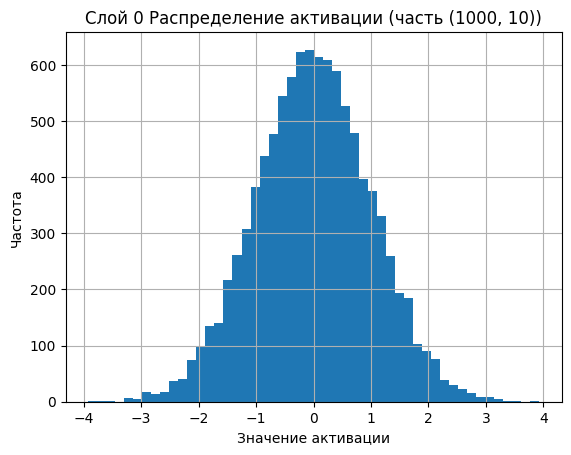

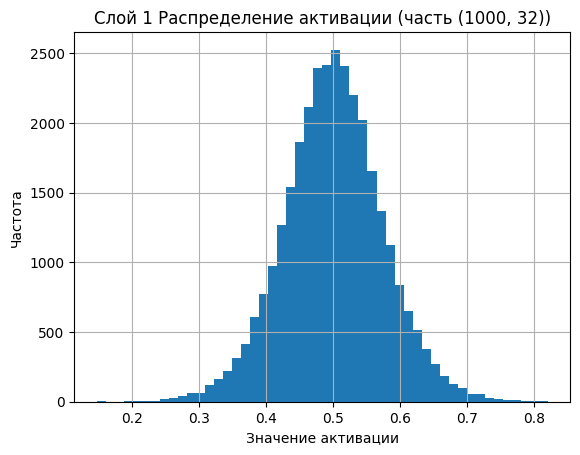

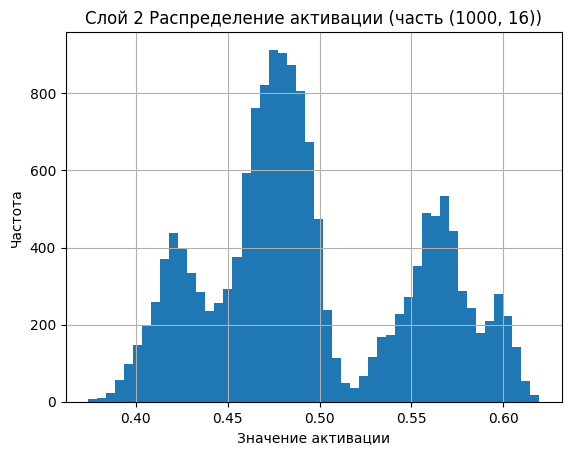

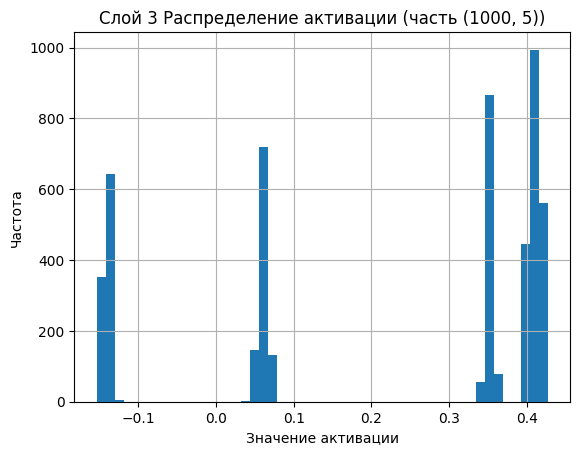

In [34]:
import numpy as np
import matplotlib.pyplot as plt

class MLP:
    def __init__(self, layer_sizes, activation='sigmoid'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W = []
        self.b = []
        for i in range(len(layer_sizes) - 1):
            in_dim = layer_sizes[i]
            out_dim = layer_sizes[i + 1]
            weight_matrix = np.random.randn(in_dim, out_dim) * 0.1
            bias_vector = np.zeros((1, out_dim))
            self.W.append(weight_matrix)
            self.b.append(bias_vector)

    def _sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def forward_with_activations(self, X):
        activations = [X]
        A = X
        for i, (W, b) in enumerate(zip(self.W, self.b)):
            Z = A.dot(W) + b
            if i < len(self.W) - 1:
                A = self._sigmoid(Z)
            else:
                A = Z
            activations.append(A)
        return activations

# Инициализируем модель с 4 слоями: 10 входов, 32 нейрон, 16 нейронов и 5 выходов
np.random.seed(42)
model = MLP([10, 32, 16, 5], activation='sigmoid')
X_rand = np.random.randn(1000, 10)

# Соберем активации
acts = model.forward_with_activations(X_rand)

# Отобразим активации каждого слоя
for idx, A in enumerate(acts):
    plt.figure()
    plt.hist(A.flatten(), bins=50)
    plt.title(f'Слой {idx} Распределение активации (часть {A.shape})')
    plt.xlabel('Значение активации')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

## Как данные проходят через сеть

### Задание 1
Расширьте класс MLP:
- 1. Допишите в классе MLP методы `_relu` и поддержку активации `relu` в `forward`. 
    - 2. Реализуйте сохранение всех `$Z$` и `$A$` каждого слоя в списки `self.Z_list` и `self.A_list`.

In [35]:
import numpy as np

class MLP:
    def __init__(self, layer_sizes, activation='sigmoid'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W, self.b = [], []
        # сюда будем складывать Z и A
        self.Z_list, self.A_list = [], []

        for i in range(len(layer_sizes) - 1):
            in_dim, out_dim = layer_sizes[i], layer_sizes[i + 1]
            self.W.append(np.random.randn(in_dim, out_dim) * 0.1)
            self.b.append(np.zeros((1, out_dim)))

    def _sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    # Напишите новый метод _relu
    def _relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        # очищаем списки перед новым вызовом
        self.Z_list, self.A_list = [], []
        A = X
        # сохраните инициализацию входного слоя в A_list
        # Ваш код здесь
        self.A_list = [X]
        for i, (W, b) in enumerate(zip(self.W, self.b)):
            # сохраняем линейную часть Z в Z_list
            Z = A.dot(W) + b
            self.Z_list.append(Z)

            if i < len(self.W) - 1:
                if self.activation == 'sigmoid':
                    A = self._sigmoid(Z)
                # Допишите активацию 'relu'
                # Ваш код здесь
                if self.activation == 'relu':
                    A = self._relu(Z)
                else:
                    raise ValueError(f"Unknown activation {self.activation}")
            else:
                A = Z

                # сохраните активацию выходного слоя слоя в A_list
                self.A_list.append(Z)


        return A

### Задание 2
1. Добавьте в MLP метод `_tanh` и ветку для активации `'tanh'`.
2. Запустите три модели с архитектурой `[3,2,1]` для активаций `'relu'`, `'sigmoid'`, `'tanh'`.
3. Выведите на экран последний `y_pred` и длины списков `Z_list` и `A_list`.

In [36]:
import numpy as np

class MLP:
    def __init__(self, layer_sizes, activation='sigmoid'):
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.W, self.b = [], []
        # сюда будем складывать Z и A
        self.Z_list, self.A_list = [], []

        for i in range(len(layer_sizes) - 1):
            in_dim, out_dim = layer_sizes[i], layer_sizes[i + 1]
            self.W.append(np.random.randn(in_dim, out_dim) * 0.1)
            self.b.append(np.zeros((1, out_dim)))

    def _sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def _relu(self, Z):
        return np.maximum(0, Z)

    # Добавьте метод _tanh
    # Ваш код здесь
    def _tanh(self, x: float) -> float:
        return np.tanh(x)

    def forward(self, X):
        # очищаем списки перед новым вызовом
        self.Z_list, self.A_list = [], []
        A = X
        # сохраните активацию входного слоя в A_list
        self.A_list.append(A)

        for i, (W, b) in enumerate(zip(self.W, self.b)):
            Z = A.dot(W) + b
            self.Z_list.append(Z)

            if i < len(self.W) - 1:
                if self.activation == 'sigmoid':
                    A = self._sigmoid(Z)
                elif self.activation == 'relu':
                    A = self._relu(Z)
                elif self.activation == 'tanh':
                    # Ваш код здесь
                    A = self._tanh(Z)
                else:
                    raise ValueError(f"Unknown activation {self.activation}")
            else:
                A = Z

            self.A_list.append(A)

        return A

x = np.array([[1.0, 2.0, -1.0]])
# Запустим три MLP модели с архитектурой 3-2-1 и различными активациями в цикле
for act in ['relu', 'sigmoid', 'tanh']:
    np.random.seed(0)
    model = MLP([3,2,1], activation=act)
    y_pred = model.forward(x)
    print(f"{act}: y_pred={y_pred.ravel()[0]:.4f}, "
          f"len(Z_list)={len(model.Z_list)}, len(A_list)={len(model.A_list)}")

    # Отобразим значения Z и A
    for i, (Z, A) in enumerate(zip(model.Z_list, model.A_list)):
        print(f"Layer {i}: Z={Z.ravel()}, A={A.ravel()}")
    print()

relu: y_pred=0.0087, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.008746], A=[0.18539703 0.58592215]

sigmoid: y_pred=0.0422, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.04217181], A=[0.54621695 0.64242895]

tanh: y_pred=0.0094, len(Z_list)=2, len(A_list)=3
Layer 0: Z=[0.18539703 0.58592215], A=[ 1.  2. -1.]
Layer 1: Z=[0.00943941], A=[0.18330168 0.52695644]

